In [1]:
import random
import numpy as np
import gym


In [2]:
env = gym.make('Taxi-v1')

[2019-02-09 15:16:40,459] Making new env: Taxi-v1
/Users/falkvandermeirsch/miniconda3/lib/python3.6/site-packages/gym/envs/registration.py:18: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
# initialize the Q_table
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0

In [5]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: q[(state, x)])

In [6]:
env.action_space

Discrete(6)

parameters of the SARA algorithm

In [7]:
alpha = 0.8
gamma = 0.9
epsilon = 0.05
decay_steps = 1000
decay_rate = 0.1

SARSA algorithm

In [8]:
reward_episodes = []
for i in range(50_000):
    # we store the cumulative reward r
    r = 0
    # initialize a state
    state = env.reset()
    
    if i % decay_steps == 0:
        epsilon = epsilon * (1 - decay_rate)
        print(f'new epsilon: {epsilon}')
    
    # select action according to the epsilon_greedy policy
    action = epsilon_greedy(state, epsilon)
    
    while True:
        # one-step look-ahead
        next_state, reward, done, _ = env.step(action)
        
        # again we select the next action using epsilon greedy policy
        next_action = epsilon_greedy(next_state, epsilon)
        
        # update our Q_value with the SARSA update rule
        q[(state, action)] += alpha * (reward + gamma * q[(next_state, next_action)] 
            - q[(state, action)])
        
        # finally we update our state and action with the next action and the next state
        action = next_action
        state = next_state
        
        # store the rewards
        r += reward
        
        # we will break the loop when the agent is at the terminal state of the episode
        if done: 
            break

    if (i % 1000) == 0:
        print(f'episode {i}: total reward: {r}')
    reward_episodes.append(r)

new epsilon: 0.045000000000000005
episode 0: total reward: -294
new epsilon: 0.04050000000000001
episode 1000: total reward: 9
new epsilon: 0.03645000000000001
episode 2000: total reward: 18
new epsilon: 0.03280500000000001
episode 3000: total reward: 14
new epsilon: 0.02952450000000001
episode 4000: total reward: 14
new epsilon: 0.02657205000000001
episode 5000: total reward: -1
new epsilon: 0.02391484500000001
episode 6000: total reward: 8
new epsilon: 0.021523360500000012
episode 7000: total reward: 14
new epsilon: 0.01937102445000001
episode 8000: total reward: 17
new epsilon: 0.01743392200500001
episode 9000: total reward: 14
new epsilon: 0.015690529804500006
episode 10000: total reward: 6
new epsilon: 0.014121476824050006
episode 11000: total reward: 6
new epsilon: 0.012709329141645007
episode 12000: total reward: 6
new epsilon: 0.011438396227480507
episode 13000: total reward: 6
new epsilon: 0.010294556604732457
episode 14000: total reward: 4
new epsilon: 0.00926510094425921
epi

In [9]:
import matplotlib.pyplot as plt


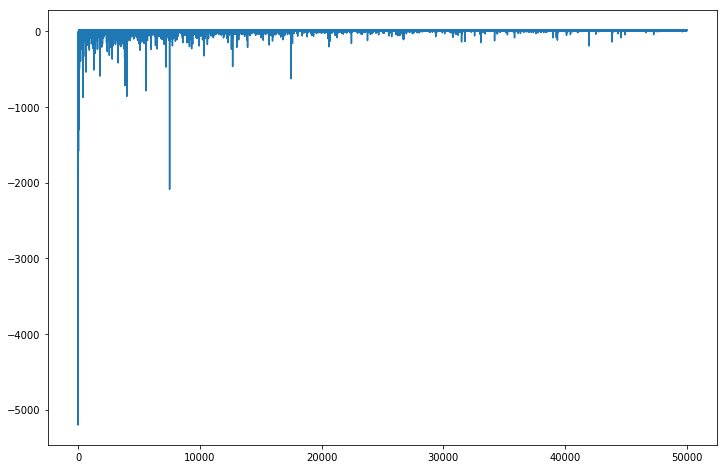

In [16]:
fig = plt.figure(figsize=(12,8))
plt.plot(reward_episodes)

In [11]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

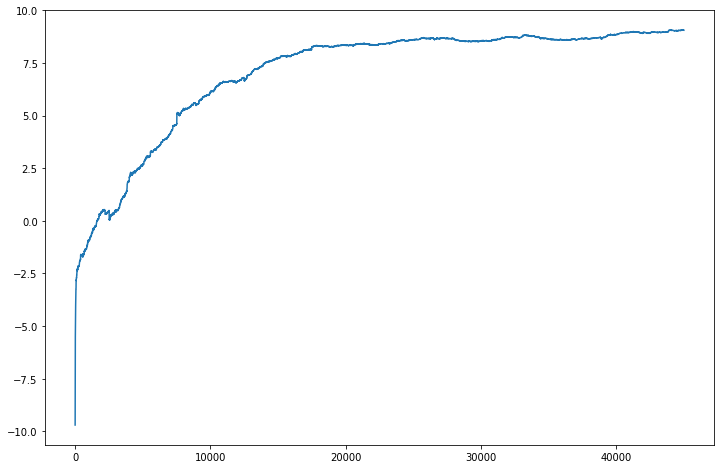

In [18]:
rew_avg = moving_average(reward_episodes, n=5000)
fig = plt.figure(figsize=(12,8))
plt.plot(rew_avg)